In [ ]:
!pip install pythainlp
!pip install attacut

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,  ConfusionMatrixDisplay
from pythainlp.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Bidirectional, GRU

### Load and preprocess the data

In [ ]:
data = pd.read_csv('Depression_Dataset.csv')

In [ ]:
data.head(10)

,text,label
0,เพราะปกติถ้ามาวัดที่โรงพยาบาลจะสูงถึงทุกครั้ง,1
1,เรากำลังจะกลับไปในจุดที่เรามีความสุขที่ได้ทำแล...,1
2,บันทึกปีศาจจิตป่วยความเสียใจที่บาดลึก,1
3,เช้าแล้วก็ยังเหมือนเดิม,1
4,ยังคงด่าทอเราได้และข่มขู่ให้เราปล่อย,1
5,เมื่อราวๆต้นปีล่ะมั้งที่เราได้ฟังเพลงของในอัลบ...,1
6,ด้วยเหตุผลนี้หมอเลยสั่งออฟยาตัวเดิม,1
7,แล้วมันไม่ช่วยอะไรเลย,1
8,เราคลื่นไส้ตลอดเวลาเวียนหัวหวิวๆในวันแรก,1
9,ฉันไม่ชอบความไม่แน่นอน,1


In [ ]:
X = data.text
y = data.label

### Tokenize Thai text

In [ ]:
def tokenize(sentence):
  return word_tokenize(sentence, engine="attacut")

In [ ]:
tokenize_list = [tokenize(sent) for sent in X ]
tokenize_list

[['เพราะ',
  'ปกติ',
  'ถ้า',
  'มา',
  'วัด',
  'ที่',
  'โรงพยาบาล',
  'จะ',
  'สูง',
  'ถึง',
  'ทุก',
  'ครั้ง'],
 ['เรา',
  'กำลัง',
  'จะ',
  'กลับ',
  'ไป',
  'ใน',
  'จุด',
  'ที่',
  'เรา',
  'มี',
  'ความ',
  'สุข',
  'ที่',
  'ได้',
  'ทำ',
  'และ',
  'พยายาม',
  'มอง',
  'กำไร',
  'ใน',
  'ระยะ',
  'ยาว',
  'แทน'],
 ['บันทึก', 'ปีศาจ', 'จิต', 'ป่วย', 'ความ', 'เสียใจ', 'ที่', 'บาด', 'ลึก'],
 ['เช้า', 'แล้ว', 'ก็', 'ยัง', 'เหมือน', 'เดิม'],
 ['ยังคง', 'ด่าทอ', 'เรา', 'ได้', 'และ', 'ข่มขู่', 'ให้', 'เรา', 'ปล่อย'],
 ['เมื่อ',
  'ราว',
  'ๆ',
  'ต้น',
  'ปี',
  'ล่ะ',
  'มั้ง',
  'ที่',
  'เรา',
  'ได้',
  'ฟัง',
  'เพลง',
  'ของ',
  'ใน',
  'อัลบั้ม',
  'ใหม่'],
 ['ด้วย', 'เหตุผล', 'นี้', 'หมอ', 'เลย', 'สั่ง', 'ออฟ', 'ยา', 'ตัว', 'เดิม'],
 ['แล้ว', 'มัน', 'ไม่', 'ช่วย', 'อะไร', 'เลย'],
 ['เรา',
  'คลื่นไส้',
  'ตลอด',
  'เวลา',
  'เวียน',
  'หัว',
  'หวิว',
  'ๆ',
  'ใน',
  'วัน',
  'แรก'],
 ['ฉัน', 'ไม่', 'ชอบ', 'ความ', 'ไม่', 'แน่นอน'],
 ['ดู', 'มี', 'เมตตา', 'มาก', 'เลย', '

In [ ]:
tokenized_texts = [' '.join(text) for text in tokenize_list]

# สร้าง tokenizer และ fit
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_texts)

#แปลงเป็นลำดับตัวเลข (sequence)
sequences = tokenizer.texts_to_sequences(tokenized_texts)
maxlen = max([len(s) for s in sequences])

padded_sequences = pad_sequences(sequences, padding='post')

print("Word Index:", tokenizer.word_index)
print("Sequences:", sequences)
print("Padded Sequences:", padded_sequences)
print("Max length =", maxlen)
print("Padded Seq shape =",padded_sequences.shape)

Word Index: {'ที่': 1, 'ไม่': 2, 'เรา': 3, 'จะ': 4, 'ได้': 5, 'ก็': 6, 'ไป': 7, 'ว่า': 8, 'เป็น': 9, 'มี': 10, 'มา': 11, 'ความ': 12, 'ให้': 13, 'ใน': 14, 'คน': 15, 'ของ': 16, 'นี้': 17, 'ๆ': 18, 'ฉัน': 19, 'และ': 20, 'แต่': 21, 'มัน': 22, 'การ': 23, 'กับ': 24, 'แล้ว': 25, 'ทำ': 26, 'ตัว': 27, 'อยู่': 28, 'นั้น': 29, 'เธอ': 30, 'กัน': 31, 'เอง': 32, 'ผม': 33, 'จาก': 34, 'อย่าง': 35, 'วัน': 36, 'เลย': 37, 'เขา': 38, 'มาก': 39, 'ต้อง': 40, 'ดี': 41, 'อะไร': 42, 'ยัง': 43, 'คิด': 44, 'ขึ้น': 45, 'นะ': 46, 'ถึง': 47, 'อีก': 48, 'ด้วย': 49, 'อยาก': 50, 'รู้สึก': 51, 'เพราะ': 52, 'ทุก': 53, 'เรื่อง': 54, 'คุณ': 55, 'เหมือน': 56, 'หรือ': 57, 'คือ': 58, 'รู้': 59, 'ออก': 60, 'ตอน': 61, 'รัก': 62, 'ชีวิต': 63, 'แบบ': 64, 'ครั้ง': 65, 'แค่': 66, 'เวลา': 67, 'สิ่ง': 68, 'กลับ': 69, 'จริง': 70, 'กว่า': 71, 'เคย': 72, 'บอก': 73, 'ใคร': 74, 'ต่อ': 75, 'จน': 76, 'เข้า': 77, 'คง': 78, 'งาน': 79, 'ผู้': 80, 'ลง': 81, 'คำ': 82, 'เมื่อ': 83, 'หนึ่ง': 84, 'ดู': 85, 'ถ้า': 86, 'อาจ': 87, 'บาง': 88, 'พูด': 8

### Apply train-test split

In [ ]:
x_train, x_test , y_train, y_test = train_test_split(padded_sequences, y, test_size = 0.3, random_state = 42)

In [ ]:
x_train, x_val , y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [ ]:
vocab_size = len(tokenizer.word_index) +1

# Bidirectional RNN

In [ ]:
np.random.seed(42)
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=300, input_length=maxlen),
    Bidirectional(SimpleRNN(units=16, activation = 'relu', return_sequences=True)),
    Bidirectional(SimpleRNN(units=32, activation = 'relu', return_sequences=True)),
    Bidirectional(SimpleRNN(units=64, activation = 'relu', return_sequences=True)),
    Bidirectional(SimpleRNN(units=128, activation = 'relu')),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(learning_rate = 0.002), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train , y_train, epochs= 3, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 42s 800ms/step - accuracy: 0.5909 - loss: 0.6564 - val_accuracy: 0.7417 - val_loss: 0.4970
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 625ms/step - accuracy: 0.7796 - loss: 0.4731 - val_accuracy: 0.7465 - val_loss: 0.5127
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 23s 630ms/step - accuracy: 0.8403 - loss: 0.3642 - val_accuracy: 0.7616 - val_loss: 0.5017


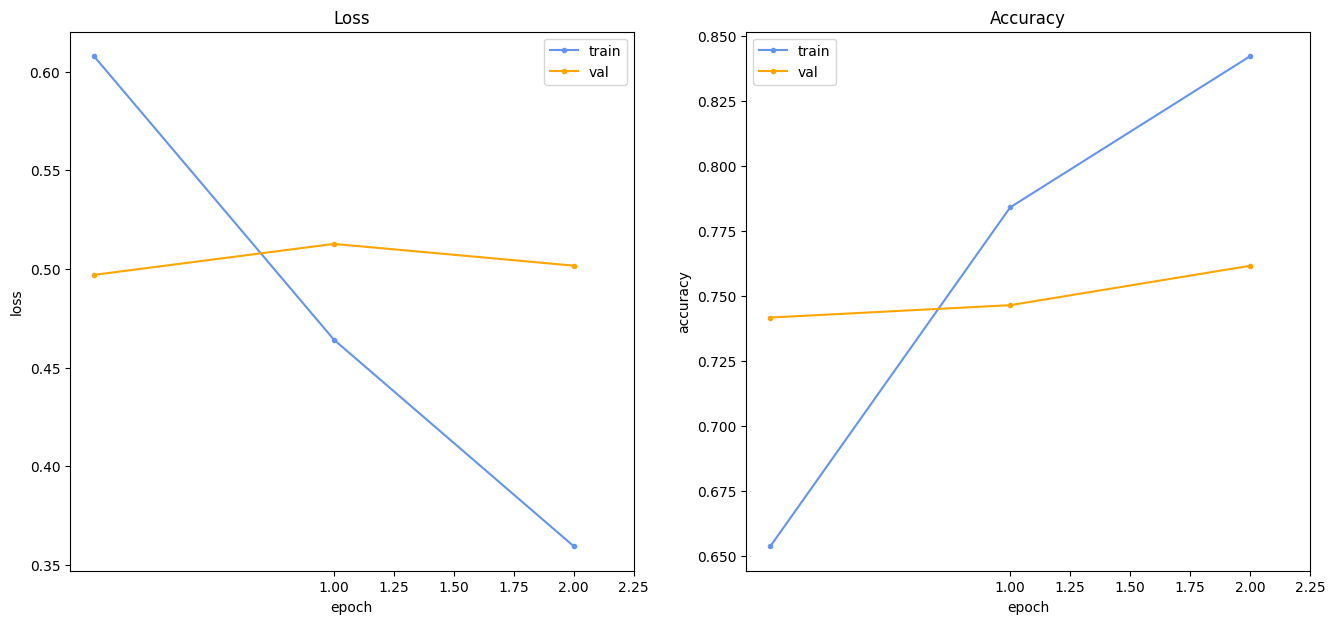

In [ ]:
hist.history.keys()
fig = plt.figure(figsize=(16, 7))

ax = fig.add_subplot(1, 2, 1)
ax.plot(hist.history["loss"],'cornflowerblue', marker='.', label="train")
ax.plot(hist.history["val_loss"],'orange', marker='.', label="val")
ax.set(xlabel='epoch', ylabel = 'loss', title='Loss')
ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))

ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist.history["accuracy"],'cornflowerblue', marker='.', label="train")
ax.plot(hist.history["val_accuracy"],'orange', marker='.', label="val")
ax.set(xlabel='epoch', ylabel = 'accuracy', title='Accuracy')
ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))

ax.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step


In [ ]:
y_pred = (y_pred >= 0.5).astype(int)
print("Bi-RNN Accuracy on test data:", round(accuracy_score(y_test, y_pred),2))

Bi-RNN Accuracy on test data: 0.76


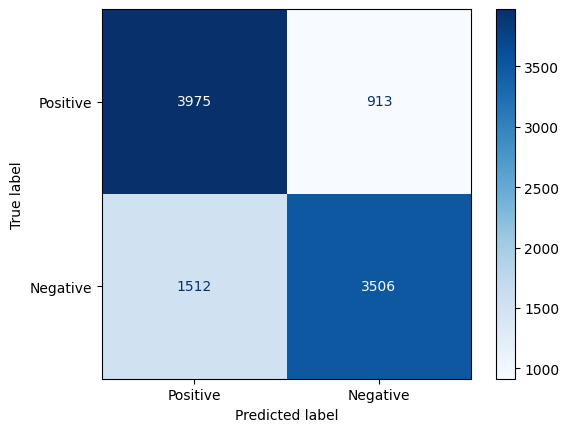

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive","Negative"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
cf = classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.72      0.81      0.77      4888
           1       0.79      0.70      0.74      5018

    accuracy                           0.76      9906
   macro avg       0.76      0.76      0.75      9906
weighted avg       0.76      0.76      0.75      9906



# Bidirectioanl GRU

In [ ]:
np.random.seed(42)
model2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=300, input_length=maxlen),
    Bidirectional(GRU(units=16, activation = 'relu', return_sequences=True)),
    Bidirectional(GRU(units=32, activation = 'relu', return_sequences=True)),
    Bidirectional(GRU(units=64, activation = 'relu', return_sequences=True)),
    Bidirectional(GRU(units=128, activation = 'relu')),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer= keras.optimizers.Adam(learning_rate = 0.0025), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist2 = model2.fit(x_train , y_train, epochs= 3, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.5781 - loss: 0.6606 - val_accuracy: 0.7387 - val_loss: 0.5052
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7847 - loss: 0.4572 - val_accuracy: 0.7629 - val_loss: 0.4768
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8358 - loss: 0.3764 - val_accuracy: 0.7701 - val_loss: 0.4653


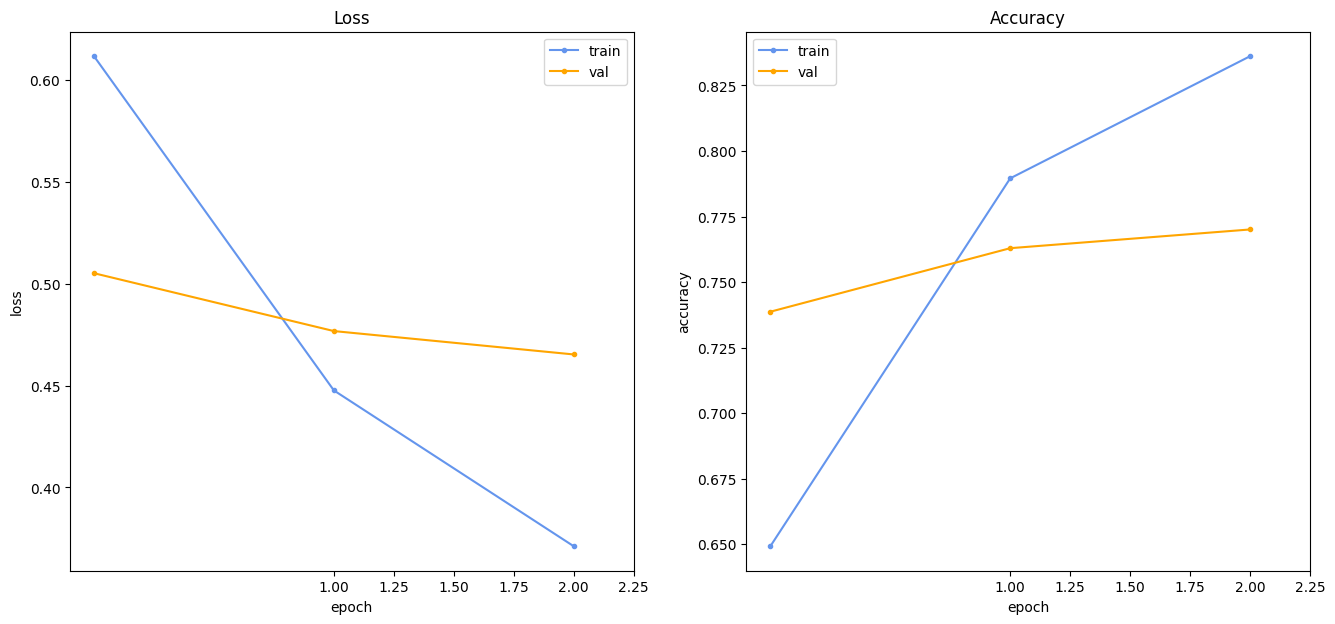

In [ ]:
hist2.history.keys()
fig = plt.figure(figsize=(16, 7))

ax = fig.add_subplot(1, 2, 1)
ax.plot(hist2.history["loss"],'cornflowerblue', marker='.', label="train")
ax.plot(hist2.history["val_loss"],'orange', marker='.', label="val")
ax.set(xlabel='epoch', ylabel = 'loss', title='Loss')
ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))

ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist2.history["accuracy"],'cornflowerblue', marker='.', label="train")
ax.plot(hist2.history["val_accuracy"],'orange', marker='.', label="val")
ax.set(xlabel='epoch', ylabel = 'accuracy', title='Accuracy')
ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))

ax.legend()
plt.show()

In [ ]:
y_pred = model2.predict(x_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step


In [ ]:
y_pred = (y_pred >= 0.5).astype(int)
print("Bi-GRU Accuracy on test data:", round(accuracy_score(y_test, y_pred),2))

Bi-GRU Accuracy on test data: 0.76


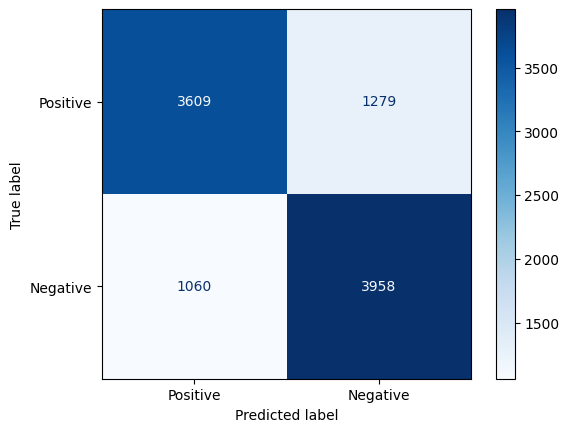

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive","Negative"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
cf = classification_report(y_test, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      4888
           1       0.76      0.79      0.77      5018

    accuracy                           0.76      9906
   macro avg       0.76      0.76      0.76      9906
weighted avg       0.76      0.76      0.76      9906



## Test With New Sample

In [ ]:
# Predict custom sentences
sample_sentences = [ "ช่วงนี้นอนไม่หลับ เบื่ออาหาร รู้สึกหมดแรงและไม่อยากคุยกับใครเลย",
    "วันนี้อารมณ์ดีมาก ไปออกกำลังกายและทำงานบ้านเรียบร้อย",
    "รู้สึกกังวลบ่อย ๆ สมาธิไม่ค่อยอยู่กับเนื้อกับตัว แต่พยายามทำงานต่อ",
    "เมื่อคืนหัวเราะกับเพื่อน ๆ สนุกดี ไม่มีอะไรให้เครียดเท่าไหร่",
    "บางวันไม่อยากลุกจากเตียงเลย เหนื่อยล้าแบบไม่มีเหตุผล",]
X_new = [ tokenize(x) for x in sample_sentences]
x_new_tokenize = []
for x in X_new :
  new_sent = []
  for token in x :
    if token in tokenizer.word_index.keys() :
      new_sent.append(tokenizer.word_index[token])
    else :
      new_sent.append(0)
  x_new_tokenize.append(new_sent)
x_new_tokenize_padded = pad_sequences(x_new_tokenize, padding='post', maxlen = maxlen)
y_pred_sample1 = model.predict(x_new_tokenize_padded)
y_pred_sample2 = model2.predict(x_new_tokenize_padded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
for i in range(len(sample_sentences)) :
  print(sample_sentences[i],":",end=' ')
  if (y_pred_sample1[i] >= 0.5) :
    print("Bi-RNN -> Postivie",end = ', ')
  else :
    print("Bi-RNN -> Negative",end = ', ')
  if (y_pred_sample2[i] >= 0.5) :
    print("Bi-GRU -> Postivie")
  else :
    print("Bi-GRU -> Negative")


ช่วงนี้นอนไม่หลับ เบื่ออาหาร รู้สึกหมดแรงและไม่อยากคุยกับใครเลย : Bi-RNN -> Postivie, Bi-GRU -> Postivie
วันนี้อารมณ์ดีมาก ไปออกกำลังกายและทำงานบ้านเรียบร้อย : Bi-RNN -> Postivie, Bi-GRU -> Postivie
รู้สึกกังวลบ่อย ๆ สมาธิไม่ค่อยอยู่กับเนื้อกับตัว แต่พยายามทำงานต่อ : Bi-RNN -> Postivie, Bi-GRU -> Postivie
เมื่อคืนหัวเราะกับเพื่อน ๆ สนุกดี ไม่มีอะไรให้เครียดเท่าไหร่ : Bi-RNN -> Negative, Bi-GRU -> Postivie
บางวันไม่อยากลุกจากเตียงเลย เหนื่อยล้าแบบไม่มีเหตุผล : Bi-RNN -> Postivie, Bi-GRU -> Postivie
